In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2016 = pd.read_csv("../data/2016.csv")
df_2017 = pd.read_csv("../data/2017.csv")
df_2018 = pd.read_csv("../data/2018.csv")
df_2019 = pd.read_csv("../data/2019.csv")

In [16]:
print("Columns 2015: ", df_2015.columns, "\n")
print("Columns 2016: ", df_2016.columns, "\n")
print("Columns 2017: ", df_2017.columns, "\n")
print("Columns 2018: ", df_2018.columns, "\n")
print("Columns 2019: ", df_2019.columns)

Columns 2015:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

Columns 2016:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

Columns 2017:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

Columns 2018:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita

In [3]:
print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [4]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [5]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [6]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
null = {
    'df_2015': df_2015.isna().sum(),
    'df_2016': df_2016.isna().sum(),
    'df_2017': df_2017.isna().sum(),
    'df_2018': df_2018.isna().sum(),
    'df_2019': df_2019.isna().sum(),
}

for name, summary in null.items():
    print("---------------------------------")
    print(f"Null Values {name}:\n---------------------------------\n{summary[summary > 0]}\n")

---------------------------------
Null Values df_2015:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2016:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2017:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2018:
---------------------------------
Perceptions of corruption    1
dtype: int64

---------------------------------
Null Values df_2019:
---------------------------------
Series([], dtype: int64)



In [9]:
nan_records = df_2018[df_2018.isna().any(axis=1)]
nan_records

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [10]:
nan_record_index = df_2018[df_2018.isna().any(axis=1)].index
df_2018.drop(nan_record_index, inplace=True)

In [11]:
# 2015
df_2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social_support',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Trust (Government Corruption)': 'Perceptions_of_corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual' 
}, inplace=True)
df_2015['Year'] = 2015

# 2016
df_2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Score',
    'Lower Confidence Interval': 'Lower_Confidence_Interval',
    'Upper Confidence Interval': 'Upper_Confidence_Interval',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social_support',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Trust (Government Corruption)': 'Perceptions_of_corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)
df_2016['Year'] = 2016

# 2017
df_2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Score',
    'Whisker.high': 'Whisker_high',
    'Whisker.low': 'Whisker_low',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social_support',
    'Health..Life.Expectancy.': 'Healthy_life_expectancy',
    'Freedom': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Trust..Government.Corruption.': 'Perceptions_of_corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
}, inplace=True)
df_2017['Year'] = 2017

# 2018
df_2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)
df_2018['Year'] = 2018

# 2019
df_2019.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social_support',
    'Healthy life expectancy': 'Healthy_life_expectancy',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions_of_corruption'
}, inplace=True)
df_2019['Year'] = 2019

In [12]:
region_dict_2016 = df_2016[['Country', 'Region']].drop_duplicates().set_index('Country').to_dict()['Region']

df_2017['Region'] = pd.NA
df_2018['Region'] = pd.NA
df_2019['Region'] = pd.NA

df_2017['Region'] = df_2017['Region'].fillna(df_2017['Country'].map(region_dict_2016))
df_2018['Region'] = df_2018['Region'].fillna(df_2018['Country'].map(region_dict_2016))
df_2019['Region'] = df_2019['Region'].fillna(df_2019['Country'].map(region_dict_2016))

df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [13]:
df.isna().sum()

Country                           0
Region                           18
Happiness_Rank                    0
Score                             0
Standard Error                  623
Economy                           0
Social_support                    0
Healthy_life_expectancy           0
Freedom_to_make_life_choices      0
Perceptions_of_corruption         0
Generosity                        0
Dystopia_Residual               311
Year                              0
Lower_Confidence_Interval       624
Upper_Confidence_Interval       624
Whisker_high                    626
Whisker_low                     626
dtype: int64

In [14]:
columns_2015 = set(df_2015.columns)
columns_2016 = set(df_2016.columns)
columns_2017 = set(df_2017.columns)
columns_2018 = set(df_2018.columns)
columns_2019 = set(df_2019.columns)

common_columns = columns_2015 & columns_2016 & columns_2017 & columns_2018 & columns_2019

print("Common columns:", common_columns)

Common columns: {'Country', 'Happiness_Rank', 'Healthy_life_expectancy', 'Generosity', 'Region', 'Perceptions_of_corruption', 'Social_support', 'Year', 'Freedom_to_make_life_choices', 'Score', 'Economy'}


In [15]:
common_columns = ['Score', 'Happiness_Rank', 'Healthy_life_expectancy', 'Social_support', 
                  'Country', 'Economy', 'Generosity', 'Year', 
                  'Freedom_to_make_life_choices', 'Region', 'Perceptions_of_corruption']

df_2015 = df_2015[common_columns]
df_2016 = df_2016[common_columns]
df_2017 = df_2017[common_columns]
df_2018 = df_2018[common_columns]
df_2019 = df_2019[common_columns]


df = pd.concat([df_2015, df_2016, df_2017,df_2018, df_2019], ignore_index=True)

region_mapping = {
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Mozambique': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa'
}

df['Region'] = df['Region'].fillna(df['Country'].map(region_mapping))
                

In [16]:
score = df.pop('Score')
df['Score'] = score

In [17]:
df

,Happiness_Rank,Healthy_life_expectancy,Social_support,Country,Economy,Generosity,Year,Freedom_to_make_life_choices,Region,Perceptions_of_corruption,Score
0,1,0.94143,1.34951,Switzerland,1.39651,0.29678,2015,0.66557,Western Europe,0.41978,7.587
1,2,0.94784,1.40223,Iceland,1.30232,0.43630,2015,0.62877,Western Europe,0.14145,7.561
2,3,0.87464,1.36058,Denmark,1.32548,0.34139,2015,0.64938,Western Europe,0.48357,7.527
3,4,0.88521,1.33095,Norway,1.45900,0.34699,2015,0.66973,Western Europe,0.36503,7.522
4,5,0.90563,1.32261,Canada,1.32629,0.45811,2015,0.63297,North America,0.32957,7.427
...,...,...,...,...,...,...,...,...,...,...,...
776,152,0.61400,0.71100,Rwanda,0.35900,0.21700,2019,0.55500,Sub-Saharan Africa,0.41100,3.334
777,153,0.49900,0.88500,Tanzania,0.47600,0.27600,2019,0.41700,Sub-Saharan Africa,0.14700,3.231
778,154,0.36100,0.51700,Afghanistan,0.35000,0.15800,2019,0.00000,Southern Asia,0.02500,3.203
779,155,0.10500,0.00000,Central African Republic,0.02600,0.23500,2019,0.22500,Sub-Saharan Africa,0.03500,3.083


In [18]:
df.isna().sum()

Happiness_Rank                  0
Healthy_life_expectancy         0
Social_support                  0
Country                         0
Economy                         0
Generosity                      0
Year                            0
Freedom_to_make_life_choices    0
Region                          0
Perceptions_of_corruption       0
Score                           0
dtype: int64

In [19]:
df.dtypes

Happiness_Rank                    int64
Healthy_life_expectancy         float64
Social_support                  float64
Country                          object
Economy                         float64
Generosity                      float64
Year                              int64
Freedom_to_make_life_choices    float64
Region                           object
Perceptions_of_corruption       float64
Score                           float64
dtype: object

In [20]:
df.drop('Happiness_Rank', axis=1, inplace=True)

In [64]:
df.to_csv('../data/data_clean.csv', index=False)

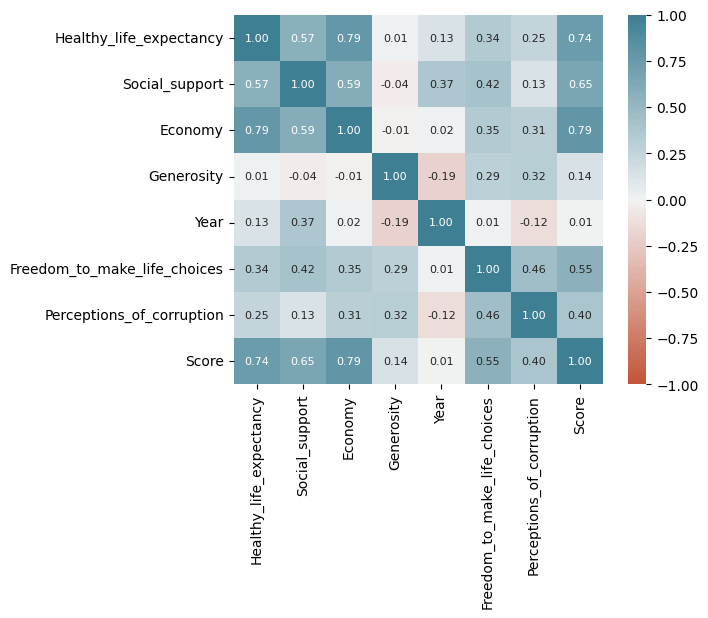

In [21]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

---

### **Model training**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import sys

In [23]:
df = pd.read_csv('../data/data_clean.csv')

In [24]:
df.head()

,Healthy_life_expectancy,Social_support,Country,Economy,Generosity,Year,Freedom_to_make_life_choices,Region,Perceptions_of_corruption,Score
0,0.94143,1.34951,Switzerland,1.39651,0.29678,2015,0.66557,Western Europe,0.41978,7.587
1,0.94784,1.40223,Iceland,1.30232,0.43630,2015,0.62877,Western Europe,0.14145,7.561
2,0.87464,1.36058,Denmark,1.32548,0.34139,2015,0.64938,Western Europe,0.48357,7.527
3,0.88521,1.33095,Norway,1.45900,0.34699,2015,0.66973,Western Europe,0.36503,7.522
4,0.90563,1.32261,Canada,1.32629,0.45811,2015,0.63297,North America,0.32957,7.427


In [25]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [26]:
df.drop(columns=['Country'], axis=1, inplace=True)

In [27]:
X = df.drop(columns=['Score']) 
y = df['Score'] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)  
    ]
)

In [30]:
models = {
    'Linear_Regression': LinearRegression(),
    'Random_Forest': RandomForestRegressor(random_state=42),
    'Gradient_Boosting': GradientBoostingRegressor(random_state=42),
    'Support_Vector_Regression': SVR(),
    'KNN_Regression': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

In [33]:
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    best_model_name = None
    best_r2 = -float('inf') 
    best_pipeline = None

    for model_name, model in models.items():
        pipeline = Pipeline(steps=[  
            ('preprocessor', preprocessor),
            ('regressor', model)  
        ])
        
        pipeline.fit(X_train, y_train)  
        
        y_pred = pipeline.predict(X_test) 
        
        mae = mean_absolute_error(y_test, y_pred)
        mse_value = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred) 
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {
            'MAE': mae,
            'MSE': mse_value,
            'RMSE': rmse,
            'R²': r2
        }

        print("---------------------------------------------------------")
        print(f"{model_name} Results:")
        print(f"R²: {r2:.4f} \nMAE: {mae:.4f}, MSE: {mse_value:.4f}, RMSE: {rmse:.4f}")
        print("---------------------------------------------------------")
        
        if r2 > best_r2:
            best_r2 = r2
            best_model_name = model_name
            best_pipeline = pipeline

    if best_pipeline is not None:
        best_model_path = f'../models/best_model_{best_model_name}.pkl'
        joblib.dump(best_pipeline, f'../models/best_model_{best_model_name}.pkl')
        print(f"Best model saved as: ../models/best_model_{best_model_name}.pkl")



In [38]:
evaluate_models(X_train, y_train, X_test, y_test, models)

old_stdout = sys.stdout
sys.stdout = StringIO()

output = sys.stdout.getvalue()

sys.stdout = old_stdout

print(output)

---------------------------------------------------------
Linear_Regression Results:
R²: 0.7632 
MAE: 0.4201, MSE: 0.2957, RMSE: 0.5438
---------------------------------------------------------


---------------------------------------------------------
Random_Forest Results:
R²: 0.8170 
MAE: 0.3723, MSE: 0.2285, RMSE: 0.4780
---------------------------------------------------------
---------------------------------------------------------
Gradient_Boosting Results:
R²: 0.8025 
MAE: 0.3916, MSE: 0.2466, RMSE: 0.4966
---------------------------------------------------------
---------------------------------------------------------
Support_Vector_Regression Results:
R²: 0.8144 
MAE: 0.3715, MSE: 0.2318, RMSE: 0.4814
---------------------------------------------------------
---------------------------------------------------------
KNN_Regression Results:
R²: 0.7914 
MAE: 0.3927, MSE: 0.2605, RMSE: 0.5104
---------------------------------------------------------
---------------------------------------------------------
XGBoost Results:
R²: 0.7836 
MAE: 0.3987, MSE: 0.2702, RMSE: 0.5199
---------------------------------------------------------
Best model saved as: ../models/best_mod